## Time evolving foliar CN vs CO2, global runs to 2100

#### Load packages

In [1]:
#Load necessary packages for data visualization 
import xarray as xr
from ctsm_py import utils
#import utils
import numpy as np
import pandas as pd
from netCDF4 import num2date
import dask 

#some resources for plotting
import matplotlib
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os,sys
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

%matplotlib inline
import pandas as pd
import datetime as dt
from datetime import datetime

#### Read in data

In [11]:
### Data for future simulations
# User defined options
model = 'CLM5_GSWP3'
## Read in slope 0 and slope 20 cases
archive = '/glade/scratch/wwieder/archive/'
caseShort = ['cnSlope0', 'cnSlope20', 'cnMulti']
cases = ['ctsm51d074_2deg_GSWP3V1_ssp370_'+short for short in caseShort]
path = '/lnd/hist/'
fin = [archive + case + path + "concat/" + case + '_cat.nc' for case in cases]
#print(fin[0])

# Read in files for .area and .landfrac
fin2 = [archive + case + path + case + '.clm2.h0.2015-01.nc' for case in cases]
#print(fin2[0])

### Read in historical data
cases2 = ['ctsm51d074_2deg_GSWP3V1_hist_'+short for short in caseShort]
finHist = [archive + case + path + "concat/" + case + '_cat.nc' for case in cases2]

# Read in files for .area and .landfrac
finHist2 = [archive + case + path + case + '.clm2.h0.1850-01.nc' for case in cases2]
print(finHist2[0])

/glade/scratch/wwieder/archive/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0/lnd/hist/ctsm51d074_2deg_GSWP3V1_hist_cnSlope0.clm2.h0.1850-01.nc


In [13]:
# Read in data, time and time_bounds just used for utils.time_set_mid
var = ['NPP', 'GPP', 'LEAFCN', 'EFLX_LH_TOT', 'TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN', 'FFIX_TO_SMINN','NBP', 'NET_NMIN','NFIX',
       'time', 'time_bounds']

'''select the variables we want to read in'''
def preprocess(ds, var=var):
    return ds[var]

# For slope 0
for i in range(len(cases)):
    dsIN = utils.time_set_mid(xr.open_mfdataset(fin[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs = utils.time_set_mid(xr.open_mfdataset(fin2[i], decode_times=True), 'time')
    dsIN['area'] = LandDs.area
    dsIN['landfrac'] = LandDs.landfrac

    if i == 0:
        ds = dsIN
    else:
        ds = xr.concat([ds,dsIN],"case",data_vars='all')


ds = ds.assign_coords(case=("case", caseShort))
ds = ds[['NPP', 'GPP', 'LEAFCN', 'FFIX_TO_SMINN','NBP', 'EFLX_LH_TOT', 'TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN','NET_NMIN', 'NFIX']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds

<xarray.Dataset>
Dimensions:        (case: 3, time: 1032, lat: 96, lon: 144)
Coordinates:
  * time           (time) object 2015-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lon            (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat            (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * case           (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables:
    NPP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    GPP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    LEAFCN         (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    FFIX_TO_SMINN  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NBP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    EFLX_LH_TOT    (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    TOTVEGC        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    ELAI           (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    TOTLITC        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    TOTLITN        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NET_NMIN       (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NFIX           (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Jul 18 07:07:16 2022: ncrcat -O...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [14]:
## Read in historical data

'''select the variables we want to read in'''
def preprocess(ds2, var=var):
    return ds2[var]

# For slope 0
for i in range(len(cases)):
    dsIN2 = utils.time_set_mid(xr.open_mfdataset(finHist[i], decode_times=True, preprocess = preprocess), 'time')
    LandDs2 = utils.time_set_mid(xr.open_mfdataset(finHist2[i], decode_times=True), 'time')
    dsIN2['area'] = LandDs2.area
    dsIN2['landfrac'] = LandDs2.landfrac

    if i == 0:
        ds2 = dsIN2
    else:
        ds2 = xr.concat([ds2,dsIN2],"case",data_vars='all')


ds2 = ds2.assign_coords(case=("case", caseShort))
ds2 = ds2[['NPP', 'GPP', 'LEAFCN', 'FFIX_TO_SMINN','NBP', 'EFLX_LH_TOT', 'TOTVEGC', 'ELAI', 'TOTLITC','TOTLITN','NET_NMIN', 'NFIX']]
#ds = ds.load()  # this may make things really slow now, but hopefully faster later on
ds2

<xarray.Dataset>
Dimensions:        (case: 3, time: 1980, lat: 96, lon: 144)
Coordinates:
  * time           (time) object 1850-01-16 11:44:59.999993 ... 2014-12-16 12...
  * lon            (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat            (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * case           (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables:
    NPP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    GPP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    LEAFCN         (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    FFIX_TO_SMINN  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NBP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    EFLX_LH_TOT    (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    TOTVEGC        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    ELAI           (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    TOTLITC        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    TOTLITN        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NET_NMIN       (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
    NFIX           (case, time, lat, lon) float32 dask.array<chunksize=(1, 1980, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Apr 25 05:33:00 2022: ncrcat ct...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

In [16]:
dsFull = xr.concat([ds,ds2],"time",data_vars='all')
dsFull

<xarray.Dataset>
Dimensions:        (case: 3, time: 3012, lat: 96, lon: 144)
Coordinates:
  * time           (time) object 2015-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon            (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat            (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * case           (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables:
    NPP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    GPP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    LEAFCN         (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    FFIX_TO_SMINN  (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NBP            (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    EFLX_LH_TOT    (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    TOTVEGC        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    ELAI           (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    TOTLITC        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    TOTLITN        (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NET_NMIN       (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
    NFIX           (case, time, lat, lon) float32 dask.array<chunksize=(1, 1032, 96, 144), meta=np.ndarray>
Attributes: (12/100)
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              Mon Jul 18 07:07:16 2022: ncrcat -O...
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    ...                                   ...
    cft_tropical_corn:                    61
    cft_irrigated_tropical_corn:          62
    cft_tropical_soybean:                 63
    cft_irrigated_tropical_soybean:       64
    time_period_freq:                     month_1
    NCO:                                  netCDF Operators version 5.0.3 (Hom...

### Convert monthly to annual

<xarray.Dataset>
Dimensions:        (time: 251, lon: 144, lat: 96, case: 3)
Coordinates:
  * time           (time) object 2015-12-16 12:00:00 ... 2014-12-16 12:00:00
  * lon            (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat            (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * case           (case) <U9 'cnSlope0' 'cnSlope20' 'cnMulti'
Data variables:
    NPP            (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    GPP            (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    LEAFCN         (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    FFIX_TO_SMINN  (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    NBP            (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    EFLX_LH_TOT    (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    TOTVEGC        (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    ELAI           (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    TOTLITC        (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    TOTLITN        (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    NET_NMIN       (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>
    NFIX           (case, time, lat, lon) float64 dask.array<chunksize=(1, 86, 96, 144), meta=np.ndarray>

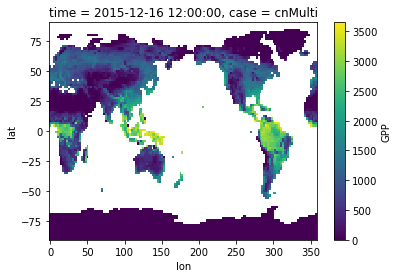

In [18]:
spy = 365 * 24 * 3600               # Convert  to annual fluxes (gC/m2/y), from gc/m2/s 
dsAnn = dsFull.apply(utils.weighted_annual_mean)
fluxes = ['GPP', 'NPP', 'NFIX', 'NET_NMIN', 'FFIX_TO_SMINN', 'NBP']
for i in range(len(fluxes)):
    dsAnn[fluxes[i]] = dsAnn[fluxes[i]] * spy

dsAnn.GPP.isel(time=0, case=2).plot() ;
dsAnn

In [ ]:
##Load to memory
# this seems to take forever...
dsAnn = dsAnn.load()
print('loaded data to memory')

### Calculate Litter CN

In [ ]:
dsAnn['LITCN'] = dsAnn.TOTLITC / dsAnn.TOTLITN
#dsAnn.TOTMICN.values
dsAnn.LITCN.isel(time=0, case=0).plot(robust=True)
dsAnn.LITCN.mean(['lat', 'lon']).isel(time=10).values

### Check the time series

In [ ]:
dsAnn.CUE.mean(['lat', 'lon']).plot(hue='case') ;
# Mask out absurd values if needed
# dsAnn['CUE'] = dsAnn.CUE.where(dsAnn.CUE > -1).where(dsAnn.CUE < 1)

### Make weights for the global sum

In [ ]:
# only weight areas for grids with GPP>0
landUp = LandDs.area * LandDs.landfrac * 1e6      # area in km2, not m2
landUp = landUp.where(dsAnn.GPP.isel(case=0).min('time') > minGPP)
landUp.attrs['units'] = 'm^2'

# weighting for each grid cell
area_wgt = (landUp / landUp.sum()).drop('case')
area_wgt.plot()
print('sum area_wgt = '+ str(area_wgt.sum().values) )

### Calculate the global sums

In [ ]:
# ?? This could also be done regionally (see Paul's comments on google doc) ??
ann_glob = (dsAnn * landUp).sum(dim=('lat', 'lon'))

## 1 mm water = 1 kg/m2,  1e-15 for kg to Tt,  1e-15 gC to PgC,
# convert to Pg C/y, mm to Tt
Cvars = ['TOTVEGC','GPP','NPP', 'NBP']
Nvars = ['NFIX', 'NET_NMIN', 'FFIX_TO_SMINN']
CNvars = ['LITCN','LEAFCN']
for i in range(len(Cvars)):
    ann_glob[Cvars[i]] = ann_glob[Cvars[i]] * 1e-15
    if Cvars[i] == 'TOTVEGC':
        
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C'
    else: 
        ann_glob[Cvars[i]].attrs['units'] = 'Pg C y^-1'
         
for i in range(len(Nvars)):
    ann_glob[Nvars[i]] = ann_glob[Nvars[i]] * 1e-12
    ann_glob[Nvars[i]].attrs['units'] = 'Tg N y^-1'
        
##Add metadata
for i in range(len(Cvars)):
    ann_glob.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
for i in range(len(Nvars)):
    ann_glob.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs


# area weighted mean
ann_Awgt = (dsAnn * area_wgt).sum(dim=('lat', 'lon'))

##Add metadata
for i in range(len(Cvars)):
    ann_Awgt.attrs[Cvars[i]] = ann_glob.get(Cvars[i]).attrs
for i in range(len(Nvars)):
    ann_Awgt.attrs[Nvars[i]] = ann_glob.get(Nvars[i]).attrs
for i in range(len(CNvars)):
    ann_Awgt.attrs[CNvars[i]] = dsAnn.get(CNvars[i]).attrs
